In [1]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

#### Supervised Learning

Machine learning is the science and art of giving computers the ability to learn to make decisions from data without being explicitly programmed. For example, your computer can learn to predict whether an email is spam or not spam given its content and sender. Another example: your computer can learn to cluster, say, Wikipedia entries, into different categories based on the words they contain. It could then assign any new Wikipedia article to one of the existing clusters. Notice that, in the first example, we are trying to predict a particular class label, that is, spam or not spam. In the second example, there is no such label. When there are labels present, we call it supervised learning. When there are no labels present, we call it unsupervised learning.

#### Unsupervised Learning
Unsupervised learning, in essence, is the machine learning task of uncovering hidden patterns and structures from unlabeled data. For example, a business may wish to group its customers into distinct categories based on their purchasing behavior without knowing in advance what these categories maybe. This is known as clustering, one branch of unsupervised learning.

#### Reinforcement Learning
There is also reinforcement learning, in which machines or software agents interact with an environment. Reinforcement agents are able to automatically figure out how to optimize their behavior given a system of rewards and punishments. Reinforcement learning draws inspiration from behavioral psychology and has applications in many fields, such as, economics, genetics, as well as game playing. In 2016, reinforcement learning was used to train Google DeepMind's AlphaGo, which was the first computer program to beat the world champion in Go.



In supervised learning, we have several data points or samples, described using predictor variables or features and a target variable. Our data is commonly represented in a table structure in which there is a row for each data point and a column for each feature. Taking the iris dataset for example, each row represents measurements of a different flower and each column is a particular kind of measurement, like the width and length of a certain part of the flower. The aim of supervised learning is to build a model that is able to predict the target variable, here the particular species of a flower, given the predictor variables, here the physical measurements. If the target variable consists of categories, like 'click' or 'no click', 'spam' or 'not spam', or different species of flowers, we call the learning task classification. Alternatively, if the target is a continuously varying variable, for example, the price of a house, it is a regression task. In this chapter, we will focus on classification. In the following, on regression.

A note on naming conventions: out in the wild, you will find that what we call a feature, others may call a predictor variable or independent variable, and what we call the target variable, others may call dependent variable or response variable.

The goal of supervised learning is frequently to either automate a time-consuming or expensive manual task, such as a doctor's diagnosis, or to make predictions about the future, say whether a customer will click on an add or not. For supervised learning, you need labeled data and there are many ways to get it: you can get historical data, which already has labels that you are interested in; you can perform experiments to get labeled data, such as A/B-testing to see how many clicks you get; or you can also crowdsourced labeling data which, like reCAPTCHA does for text recognition. In any case, the goal is to learn from data for which the right output is known, so that we can make predictions on new data for which we don't know the output. There are many ways to perform supervised learning in Python.We will use scikit-learn, or sklearn, one of the most popular and user-friendly machine learning libraries for Python. It also integrates very well with the SciPy stack, including libraries such as NumPy. There are a number of other ML libraries out there, such as TensorFlow and keras.


## Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#### Numerical EDA

We'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. 

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called df. Use pandas' .head(), .info(), and .describe()

In [3]:
df = pd.read_csv('datasets/votes.csv', index_col = 0)

In [4]:
#Looking at the first 5 rows of the data
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
1,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [5]:
# Description of the dataset
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,0.430876,0.557604,0.608295,0.405530,0.520737,0.649770,0.582949,0.592166,0.527650,0.511521,0.345622,0.391705,0.536866,0.608295,0.400922,0.857143
std,0.495770,0.497244,0.488695,0.491561,0.500146,0.477593,0.493640,0.491999,0.499811,0.500444,0.476120,0.488695,0.499214,0.488695,0.490651,0.350331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              434 non-null    object
 1   infants            434 non-null    int64 
 2   water              434 non-null    int64 
 3   budget             434 non-null    int64 
 4   physician          434 non-null    int64 
 5   salvador           434 non-null    int64 
 6   religious          434 non-null    int64 
 7   satellite          434 non-null    int64 
 8   aid                434 non-null    int64 
 9   missile            434 non-null    int64 
 10  immigration        434 non-null    int64 
 11  synfuels           434 non-null    int64 
 12  education          434 non-null    int64 
 13  superfund          434 non-null    int64 
 14  crime              434 non-null    int64 
 15  duty_free_exports  434 non-null    int64 
 16  eaa_rsa            434 non-null    int64 
dt

#### Visual EDA
The Numerical EDA we did above gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's `countplot`.

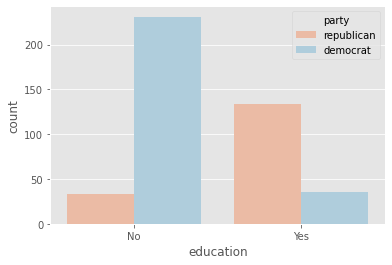

In [7]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with `plt.figure()` so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

####  k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. 

In [8]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

Now that our k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

#### k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In [9]:
X_new = np.array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541]])

In [10]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis = 1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


#### Measuring Model Performance

In classification problems, accuracy is a commonly-used metric. The accuracy of a classifier is defined as the number of correct predictions divided by the total number of data points. This begs the question though: which data do we use to compute accuracy? What we are really interested in is how well our model will perform on new data, that is, samples that the algorithm has never seen before.

Well, you could compute the accuracy on the data you used to fit the classifier. However, as this data was used to train it, the classifier's performance will not be indicative of how well it can generalize to unseen data. For this reason, it is common practice to split your data into two sets, a training set and a test set. You train or fit the classifier on the training set. Then you make predictions on the labeled test set and compare these predictions with the known labels. You then compute the accuracy of your predictions.

To do this, we first import train test split from sklearn dot model selection. We then use the train test split function to randomly split our data. The first argument will be the feature data, the second the targets or labels. The test size keyword argument specifies what proportion of the original data is used for the test set. Lastly, the random state kwarg sets a seed for the random number generator that splits the data into train and test. Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results. train test split returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into four variables: X train, X test, y train, and y test, respectively. By default, train test split splits the data into 75% training data and 25% test data, which is a good rule of thumb. We specify the size of the test size using the keyword argument test size, which we do here to set it to 30%. It is also best practice to perform your split so that the split reflects the the labels on your data. That is, you want the labels to be distributed in train and test sets as they are in the original dataset. To achieve this, we use the keyword argument stratify equals y, where y the list or array containing the labels. We then instantiate our K-nearest neighbors classifier, fit it to the training data using the fit method, make our predictions on the test data and store the results as y pred. Printing them shows that the predictions take on three values, as expected. To check out the accuracy of our model, we use the score method of the model and pass it X test and y test.



#### The Digits Recognition Dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes.  We'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets. 

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images.
On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these `Bunch` objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

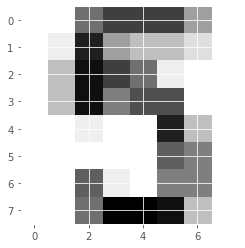

In [11]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

#### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

#### Overfitting and underfitting
You will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

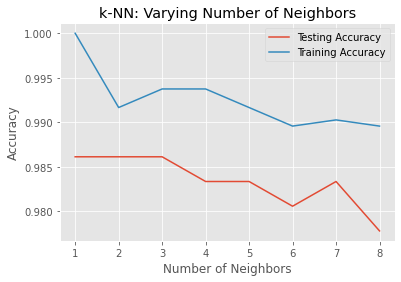

In [13]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 1, 2 and 3 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data

## Regression 

In regression tasks, the target value is a continuously varying variable, such as a country's GDP or the price of a house.

#### Supervised Learning
You will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. 

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method. 

In [14]:
df = pd.read_csv('datasets/gm_2008_region.csv')
df.drop('Region', axis = 1, inplace = True)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [15]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Notice the differences in shape before and after applying the `.reshape()` method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

As always, it is important to explore your data before building models. Cells that are in green show positive correlation, while cells that are in red show negative correlation 

<AxesSubplot:>

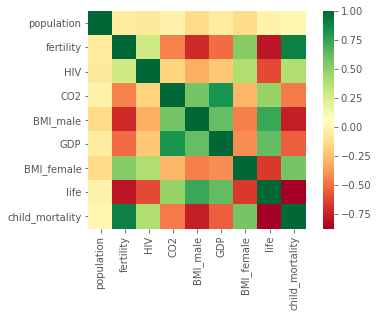

In [16]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

#### Regression Mechanics
We want to fit a line to the data and a line in two dimensions is always of the form `y = ax + b`, where `y` is the target, `x` is the single feature, and `a` and `b` are the parameters of the model that we want to learn. So the question of fitting is reduced to: how do we choose `a` and `b`? A common method is to define an error function for any given line and then to choose the line that minimizes the error function. Such an error function is also called a loss or a cost function.

What will our loss function be? Intuitively, we want the line to be as close to the actual data points as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. This distance is called a residual. Now, we could try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason we minimize the sum of the squares of the residuals! This will be our loss function and using this loss function is commonly called ordinary least squares, or OLS for short. Note that this is the same as minimizing the mean squared error of the predictions on the training set. When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.

When we have two features and one target, a line is of the form `y = a1x1 + a2x2 + b`, so to fit a linear regression model is to specify three variables, `a1`, `a2`, and `b`. In higher dimensions, that is, when we have more than one or two features, a line of this form, so fitting a linear regression model is to specify a coefficient, `ai`, for each feature, as well as the variable, `b`. The scikit-learn API works exactly the same in this case: you pass the fit method two arrays: one containing the features, the other the target variable. 

We split it into training and test sets; we instantiate the regressor, fit it on the training set and predict on the test set. We saw that, in the world of classification, we could use accuracy as a metric of model performance. The default scoring method for linear regression is called R squared. Intuitively, this metric quantifies the amount of variance in the target variable that is predicted from the feature variables. See the scikit-learn documentation and our statistics curriculum for more details. To compute the R squared, we once again apply the method score to the model and pass it two arguments: the test data and the test data target. Note that generally you will never use linear regression out of the box like this; you will most likely wish to use regularization.

#### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. We will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using sckit-learn's .score() method.

In [17]:
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

0.6192442167740035


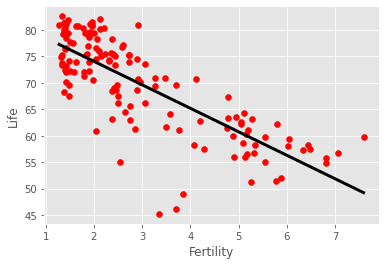

In [18]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
_= plt.scatter(df['fertility'], df['life'], color = 'red')
_= plt.plot(prediction_space, y_pred, color='black', linewidth=3)
_= plt.xlabel('Fertility')
_= plt.ylabel('Life')
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature. 

In [19]:
X = df[['population','fertility','HIV','CO2', 'BMI_male','GDP','BMI_female', 'child_mortality']].values
y = df['life'].values

#### Train/test split for regression
Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

We will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. 

In [20]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. 

#### Cross Validation
If you're computing R squared on your test set, the R squared returned is dependent on the way that you split up the data! The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation. 

We begin by splitting the dataset into five groups or folds. Then we hold out the first fold as a test set, fit our model on the remaining four folds, predict on the test set, and compute the metric of interest. Next, we hold out the
second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest. Then similarly with the third, fourth, and fifth fold. 

As a result we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals. 

As we split the dataset into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use k folds, it is called k-fold cross validation or k-fold CV. There is, however, a trade-off as using more folds is more computationally expensive. This is because you are fittings and predicting more times. This method avoids the problem of your metric of choice being dependent on the train test split.

#### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses  as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

In [21]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.859962772279345


Now that you have cross-validated your model, you can more confidently evaluate its predictions

#### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. 

In the IPython Shell, we will use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10

In [22]:
# Import necessary modules
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.8718712782622262
0.8436128620131267


In [23]:
%timeit cross_val_score(reg, X, y, cv = 3)

4.27 ms ± 89.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%timeit cross_val_score(reg, X, y, cv = 10)

13.5 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Regularized Regression
What fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. 

The first type of regularized regression that we'll look at is called ridge regression in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is. Note that alpha is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge regression is similar to picking k in KNN. This is called hyperparameter tuning. This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity. Notice that when alpha is equal to zero, we get back OLS. Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. The method of performing ridge regression with scikit-learn mirrors the other models that we have seen. We import Ridge from sklearn dot linear model, we split our data into test and train, fit on the training, and predict on the test. Note that we set alpha using the keyword argument alpha. Also notice the argument normalize: setting this equal to True ensures that all our variables are on the same scale.

There is another type of regularized regression called lasso regression, in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha. One of the really cool aspects of lasso regression is that it can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be exactly zero. The features whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm.

#### Regularization I: Lasso
You will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

In [25]:
X = df.drop('life', axis = 1).values
y = df['life'].values

In [26]:
df = df.drop('life', axis = 1)
df_columns = df.columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


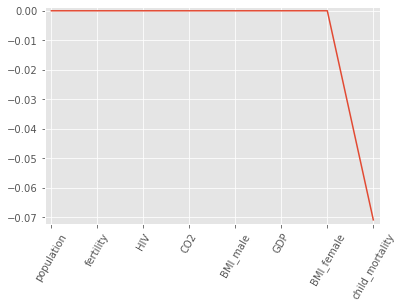

In [27]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X, y)


# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as  regularization because the regularization term is the  norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the  norm. We will practice fitting ridge regression models over a range of different alphas, and plot cross-validated  scores for each, using this function:

In [28]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

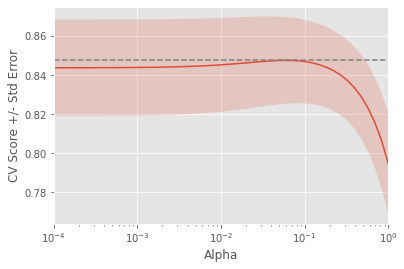

In [29]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?

#### How good is your model?
In classification, we've seen that you can use accuracy, the fraction of correctly classified samples, to measure model performance. However, accuracy is not always a useful metric. Consider a spam classification problem in which 99% of emails are real and only 1% are spam. I could build a model that classifies all emails as real; this model would be correct 99% of the time and thus have an accuracy of 99%, which sounds great. However, this naive classifier does a horrible job of predicting spam: it never predicts spam at all, so it completely fails at its original purpose. The situation when one class is more frequent is called class imbalance because the class of real emails contains way more instances than the class of spam. This is a very common situation in practice and requires a more nuanced metric to assess the performance of our model. 

Usually, the "class of interest" is called the positive class. As we are trying to detect spam, this makes spam the positive class. Which class you call positive is really up to you. So why do we care about the confusion matrix? First, notice that you can retrieve accuracy from the confusion matrix: it's the sum of the diagonal divided by the total sum of the matrix. There are several other important metrics you can easily calculate from the confusion matrix. Precision, which is the number of true positives divided by the total number of true positives and false positives. It is also called the positive predictive value or PPV. In our case, this is the number of correctly labeled spam emails divided by the total number of emails classified as spam. Recall, which is the number of true positives divided by the total number of true positives and false negatives. This is also called sensitivity, hit rate, or true positive rate. The F1-score is defined as two times the product of the precision and recall divided by the sum of the precision and recall, in other words, it's the harmonic mean of precision and recall. To put it in plain language, high precision means that our classifier had a low false positive rate, that is, not many real emails were predicted as being spam. Intuitively, high recall means that our classifier predicted most positive or spam emails correctly.

#### Metrics for classification
You evaluated the performance of your k-NN classifier based on its accuracy. However, accuracy is not always an informative metric. 

We will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report. in the example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class. Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [30]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
diabetes.columns = map(str.lower, diabetes.columns)
diabetes.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [32]:
diabetes.rename(columns = {'bloodpressure':'diastolic', 'skinthickness':'triceps', 'diabetespedigreefunction':'pdf',
                           'outcome':'diabetes'}, inplace = True)

In [33]:
diabetes.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'pdf', 'age', 'diabetes'],
      dtype='object')

In [34]:
y = diabetes['diabetes'].values
X = diabetes.drop('diabetes', axis = 1).values

In [35]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

#### Logistic regression and the ROC curve

Despite its name, logistic regression is used in classification problems, not regression problems. 

##### Logistic regression for binary classification
Given one feature, log reg will output a probability, p, with respect to the target variable. If p is greater than 0.5, we label the data as '1'; if p is less than 0.5, we label it '0'. Note that log reg produces a linear decision boundary. Using logistic regression in scikit-learn follows exactly the same formula that you now know so well: perform the necessary imports, instantiate the classifier, split your data into training and test sets, fit the model on your training data, and predict on your test set. Notice that in defining logistic regression, we have specified a threshold of 0.5 for the probability, a threshold that defines our model. Note that this is not particular for log reg but also could be used for KNN, for example. Now, what happens as we vary this threshold? In particular, what happens to the true positive and false positive rates as we vary the threshold? 

When the threshold equals zero, the model predicts '1' for all the data, which means the true positive rate is equal to the false positive rate is equal to one. When the threshold equals '1', the model predicts '0' for all data, which means that both true and false positive rates are 0. If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates. The set of points we get when trying all possible thresholds is called the receiver operating characteristic curve or ROC curve. 

To plot the ROC curve, we import roc curve from `sklearn.metrics`; we then call the function roc curve; the first argument is given by the actual labels, the second by the predicted probabilities. We unpack the result into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds. We can then plot the FPR and TPR using pyplot's plot function to produce a figure.

#### Building a logistic regression model
scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

In [36]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



#### Plotting an ROC curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

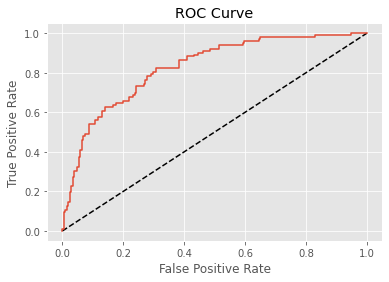

In [37]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Area Under the ROC Curve
Now the question is: given the ROC curve, can we extract a metric of interest? Consider the following: the larger the area under the ROC curve, the better our model is! The way to think about this is the following: if we had a model which produced an ROC curve that had a single point at 1,0, the upper left corner, representing a true positive rate of one and a false positive rate of zero, this would be a great model! For this reason, the area under the ROC, commonly denoted as AUC, is another popular metric for classification models. To compute the AUC, we import `roc_auc_score` from `sklearn.metrics`. We instantiate our classifier, split our data into train and test sets, and fit the model to the training set. To compute the AUC, we first compute the predicted probabilities as above and then pass the true labels and the predicted probabilities to roc auc score. We can also compute the AUC using cross-validation. To do so, we import and use the function `cross_val_score` as before, passing it the estimator, the features, and the target. We then additionally pass it the keyword argument scoring equals "roc auc" and print the AUC list.

#### AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [38]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80759259 0.82666667 0.87509434 0.83245283]


#### Hyperparameter Tuning
We have seen that when fitting a linear regression, what we are really doing is choosing parameters for the model that fit the data the best. We also saw that we had to choose a value for the alpha in ridge and lasso regression before fitting it. Analogously, before fitting and predicting K-nearest neighbors, we need to choose n neighbors. Such parameters, ones that need to be specified before fitting a model, are called hyperparameters. In other words, these are parameters that cannot be explicitly learned by fitting the model. Herein lies a fundamental key for building a successful model: choosing the correct hyperparameter. The basic idea is to try a whole bunch of different values, fit all of them separately, see how well each performs, and choose the best one! This is called hyperparameter tuning and doing so in this fashion is the current standard. Now, when fitting different values of a hyperparameter, it is essential to use cross-validation as using train test split alone would risk overfitting the hyperparameter to the test set. Even after tuning our hyperparameters using cross-validation, we'll want to have already split off a test set in order to report how well our model can be expected to perform on a dataset that it has never seen before.

##### Grid Search Cross Validation
The basic idea is as follows: we choose a grid of possible values we want to try for the hyperparameter or hyperparameters. For example, if we had two hyperparameters, C and alpha. We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters. We then choose for our model the choice of hyperparameters that performed the best! This is called a grid search and in scikit-learn we implement it using the class `GridSearchCV`. 

We import `GridSearchCV` from `sklearn.model_selection`. We then specify the hyperparameter as a dictionary in which the keys are the hyperparameter names, such as n neighbors in KNN or alpha in lasso regression. The values in the grid dictionary are lists containing the values we wish to tune the relevant hyperparameter or hyperparameters over. If we specify multiple parameters, all possible combinations will be tried. As always, we instantiate our classifier. We then use GridSearchCV and pass it our model, the grid we wish to tune over and the number of folds that we wish to use. This returns a GridSearch object that you can then fit to the data and this fit performs the actual grid search inplace. We can then apply the attributes best params and best score, respectively, to retrieve the hyperparameters that perform the best along with the mean cross-validation score over that fold.

#### Hyperparameter tuning with GridSearchCV
Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: `C` . `C` controls the inverse of the regularization strength. A large  can lead to an overfit model, while a small  can lead to an underfit model.

In [39]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg 
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7773703420762244


#### Hyperparameter tuning with RandomizedSearchCV
`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [40]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.7369747899159663


Note that `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

#### Hold Out set for final evaluation

I may want to report how well my model can be expected to perform on a dataset that it has never seen before, given my scoring function of choice. So, I want to use my model to predict on some labeled data, compare my prediction to the actual labels, and compute the scoring function. However, if I have used all of my data for cross-validation, estimating my model performance on any of it may not provide an accurate picture of how it will perform on unseen data. For this reason, it is important to split all of my data at the very beginning into a training set and hold-out set, then perform cross-validation on the training set to tune my model's hyperparameters. After this, I can select the best hyperparameters and use the hold-out set, which has not been used at all, to test how well the model can be expected to perform on a dataset that it has never seen before.

#### Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to , logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. 

In [41]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7760869565217391


#### Hold-out set in practice II: Regression
Lasso uses the `L1` penalty to regularize, while ridge uses the `L2` penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the `L1` and `L2` penalties:  $ a * L1 + b * L2 $

In [42]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702712
Tuned ElasticNet MSE: 0.16664179543611007


#### Preprocessing Data
All the data that you have used so far has been relatively nice and in a format that allows you to plug and play into scikit-learn from the get-go. With real-world data, this will rarely be the case, and instead you will have to preprocess your data before you can build models. In this chapter, you will learn all about this vital preprocessing step. 

Say you are dealing with a dataset that has categorical features, such as 'red' or 'blue', or 'male' or 'female'. As these are not numerical values, the scikit-learn API will not accept them and you will have to preprocess these features into the correct format. Our goal is to convert these features so that they are numerical. The way we achieve this by splitting the feature into a number of binary features called 'dummy variables', one for each category: '0' means the observation was not that category, while '1' means it was. For example, say we are dealing with a car dataset that has a 'origin' feature with three different possible values: 'US', 'Asia', and 'Europe'. We create binary features for each of the origins, as each car is made in exactly one country, each row in the dataset will have a one in exactly one of the three columns and zeros in the other two. Notice that in this case, if a car is not from the US and not from Asia, then implicitly, it is from Europe. That means that we do not actually need three separate features, but only two, so we can delete the 'Europe' column. If we do not do this, we are duplicating information, which might be an issue for some models.

There are several ways to create dummy variables in Python. In scikit-learn, we can use OneHotEncoder. Or we can use pandas' get dummies function.

In [43]:
df = pd.read_csv('datasets/gm_2008_region.csv')

In [44]:
df.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


#### Exploring categorical features

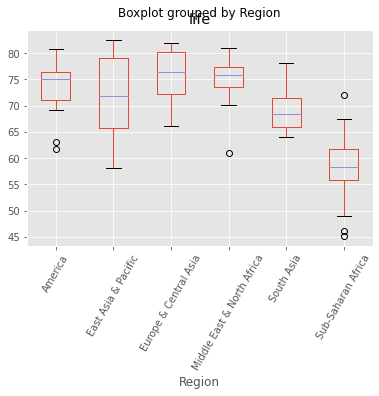

In [45]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
#df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


#### Creating dummy variables
scikit-learn does not accept non-numerical features. You saw in the previous cell that the `'Region'` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables.

In [46]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first = True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Now that you have created the dummy variables, you can use the `'Region'` feature to predict life expectancy!

#### Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.

In [47]:
y = df_region['life'].values
X = df_region.drop('life', axis = 1).values

In [48]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


#### Handling Missing Data
We say that data is missing when there is no value for a given feature in a particular row. This can occur in the real-world for many reasons: there may have been no observation, there may have been a transcription error, or the data may have been corrupted. 

Let's now load the PIMA Indians dataset. It doesn't look like it has any missing values as, according to `df.info`, all features have 768 non-null entries. However, missing values can be encoded in a number of different ways, such as by zeroes, or question marks, or negative ones. Checking out `df.head()`, it looks as though there are observations where insulin is zero. And triceps, which is the thickness of the skin, is zero. These are not possible and, as we have no indication of the real values, the data is, for all intents and purposes, missing. Before we go any further, let's make all these entries 'NaN' using the replace method on the relevant columns. So, how do we deal with missing data? One way is to drop all rows containing missing data. We can do so using the pandas DataFrame method dropna. Checking out the shape of the resulting data frame, though, we see that we now have only approximately half the rows left! We've lost half of our data and this is unacceptable. If only a few rows contain missing values, then it's not so bad, but generally we need a more robust method. It is generally an equally bad idea to remove columns that contain NaNs. Another option is to impute missing data. All imputing means is to make an educated guess as to what the missing values could be. A common strategy is, in any given column with missing values, to compute the mean of all the non-missing entries and to replace all missing values with the mean. Let's try this now on our dataset. We import `Imputer` from `sklearn.preprocessing` and instantiate an instance of the Imputer: `imp`. The keyword argument missing values here specifies that missing values are represented by NaN; strategy specifies that we will use the mean as described above; axis equals 0 specifies that we will impute along columns, a '1' would mean rows. Now, we can fit this imputer to our data using the fit method and then transform our data using the transform method! Due to their ability to transform our data as such, imputers are known as transformers, and any model that can transform data this way, using the transform method, is called a transformer. After transforming the data, we could then fit our supervised learning model to it, but is there a way to do both at once?

We can use the scikit-learn pipeline object. We import `Pipeline` from `sklearn.pipeline` and `Imputer` from `sklearn.preprocessing`. We also instantiate a log reg model. We then build the Pipeline object! We construct a list of steps in the pipeline, where each step is a 2-tuple containing the name you wish to give the relevant step and the estimator. We then pass this list to the Pipeline constructor. We can split our data into training and test sets and fit the pipeline to the training set and then predict on the test set, as with any other model. For good measure here, we compute accuracy. Note that, in a pipeline, each step but the last must be a transformer and the last must be an estimator, such as, a classifier or a regressor.



#### Dropping missing data
Different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as `NaN`. We use `NaN` because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In [49]:
df = pd.read_csv('datasets/votes_data.csv')

In [50]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [51]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


#### Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

In [52]:
y = df['party']
X = df.drop('party', axis = 1)

In [53]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values = 'NaN', strategy = 'most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



#### Centering & Scaling 

To motivate this, let's use `df.describe()` to check out the ranges of the feature variables in the red wine quality dataset. The features are chemical properties such as `acidity`, `pH`, and `alcohol_content`. The target value is good or bad, encoded as '1' and '0', respectively. We see that the ranges vary widely: 'density' varies from `0.99` to to `1` and 'total sulfur dioxide' from `6` to `289`!

Many machine learning models use some form of distance to inform them so if you have features on far larger scales, they can unduly influence your model. For example, K-nearest neighbors uses distance explicitly when making predictions. For this reason, we actually want features to be on a similar scale. To achieve this, we do what is called normalizing or scaling and centering.

There are several ways to normalize your data: given any column, you can subtract the mean and divide by the variance so that all features are centred around zero and have variance one. This is called standardization. You can also subtract the minimum and divide by the range of the data so the normalized dataset has minimum zero and maximum one. You can also normalize so that data ranges from -1 to 1 instead.

#### Centering and scaling your data
The performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact. 

Here we will explore the white wine dataset. The `'quality'` feature will be used to create a binary target variable: If `'quality'` is less than `5`, the target variable is `1`, and otherwise, it is `0`. 

In [54]:
df = pd.read_csv('datasets/white-wine.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [55]:
### Creating the binary variable in the 'quality' column 

df['quality'] = df.quality.apply(lambda x: 1 if x < 5 else 0) # Altering the 'quality column using a lambda function'
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0


In [56]:
#Just checking to see if the lambda function above returned the desired results. Seems great!
df[df['quality'] == 1].head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
46,6.2,0.450,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8,1
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,1
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.9940,3.63,0.40,9.7,1


In [57]:
y = df['quality']
X = df.drop('quality', axis = 1).values

In [58]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

#### Centering and scaling in a pipeline
With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

In [59]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9693877551020408
Accuracy without Scaling: 0.9693877551020408


#### Pipeline for classification

In [60]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


#### Pipeline for regression

In [61]:
#The gapminder dataset
df = pd.read_csv('datasets/gm_2008_region.csv')
df.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America


population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [66]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio': np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.03467831194788973
